## Python Hackathon - Data Miners

## Q1- 40

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
from datetime import date,datetime

## 1.Make a pair plot on Readmission Registry table & do u see any correlation between columns values

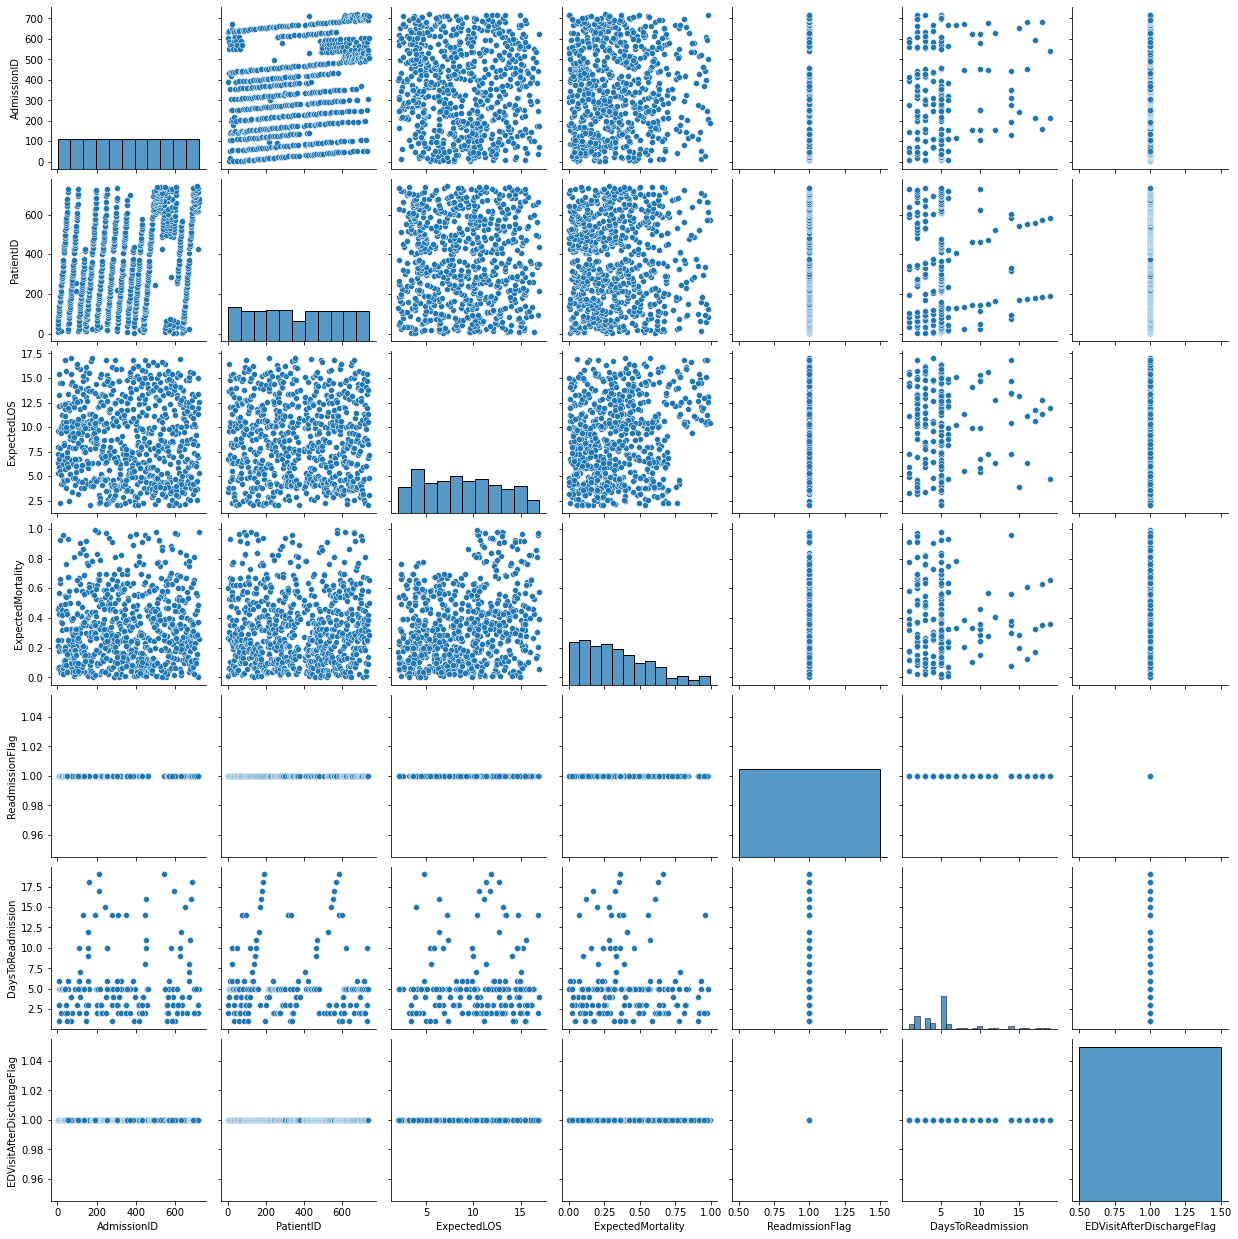

,AdmissionID,PatientID,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
AdmissionID,1.000000,0.302079,-0.070080,0.034083,NaN,0.049632,NaN
PatientID,0.302079,1.000000,-0.015485,0.008014,NaN,0.001710,NaN
ExpectedLOS,-0.070080,-0.015485,1.000000,0.220725,NaN,0.010294,NaN
ExpectedMortality,0.034083,0.008014,0.220725,1.000000,NaN,-0.052563,NaN
ReadmissionFlag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DaysToReadmission,0.049632,0.001710,0.010294,-0.052563,NaN,1.000000,NaN
EDVisitAfterDischargeFlag,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df=pd.read_excel("HospitalDatabase.xlsx",sheet_name="ReAdmissionRegistry")
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
sns.pairplot(df)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
plt.show()
corr
# ExpectedLOS & ExpectedMortality are slightly positively correlated (0.22)

## 2. Using iloc, retrieve the firstname and lastname of patients between indices 101 and 200

In [3]:
df=pd.read_excel("HospitalDatabase.xlsx",sheet_name="Patients")
df.loc[101:200,"FirstName":"LastName"]

,FirstName,LastName
101,Gipsy,Frankton
102,Jethro,Wharin
103,Viv,Aylward
104,Swift,Dreschler
105,Fadel,Jacquemard
...,...,...
196,Noam,Laguerre
197,Arie,Bayless
198,Janaye,O'Mohun
199,Fonz,Group


## 3."Create a figure object called fig using plt.figure() **
#** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. ** #** Plot (x,y) on that axes and set the labels."

Text(0.5, 1.0, 'newaxisax')

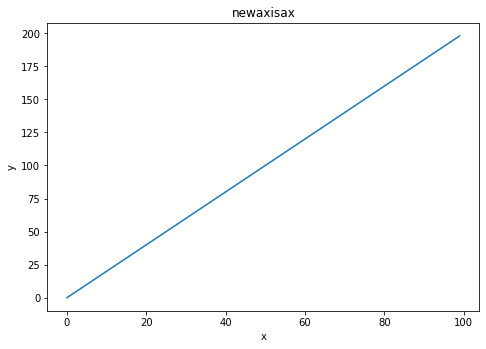

In [4]:
x = np.arange(0,100)
y = x*2
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('newaxisax')

## 4.Display Data By splitting age in 4 quartiles and labeling the quartiles

In [5]:
df=pd.read_excel("HospitalDatabase.xlsx",sheet_name="Patients")
now = datetime.now()
df['Age'] =(now - df['DateOfBirth'])/np.timedelta64(1,'Y')

# Splitting Age Column into Four Quantiles
df['Age Groups'] = pd.qcut(df['Age'], 4, labels = False)
df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,Age Groups
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,62.395715,3
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,36.522249,0
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,46.107579,1
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,53.606630,2
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,60.063564,3
...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,35.996813,0
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,51.953602,2
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,39.372903,0
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,58.969686,3


## 5.Display full name of patients who are born in 1986

In [6]:
df=pd.read_excel("HospitalDatabase.xlsx",sheet_name="Patients")
df['Fullname']= df.FirstName.str.cat(df.LastName)
df['Year'] = pd.DatetimeIndex(df['DateOfBirth']).year
df2 = df.loc[df['Year'] == 1986]
print(df2['Fullname'])

23         Gabriel Joseph
24         Lincoln Brenda
29             AlaHalpert
72            LolitaDarci
164         FadelBernardt
238         BentleyKippax
367            ValeOlanda
373          BrittDureden
386       CristabelChatel
415       ConstantiaGroup
452       MorganScrowston
561             DomBaglow
568        IgnazioMelling
595         HomenickRings
639           HashimSlark
643       EllieRamsbotham
674        LlewellynGroup
714             NilesShaw
733             YvetteInc
777          SiouxieGroup
852            CarlyGroup
868        WorthPickering
877           ArniBaldack
909       KuvalisCoupland
922    RebbeccaRollingson
940            WatFideler
Name: Fullname, dtype: object


## 6. Create a jointplot on expected mortality & expected length of stay - Attempted Q 49

## 7.Create a pair plot on whole dataframe by taking parameter "hue" as EDDisposition

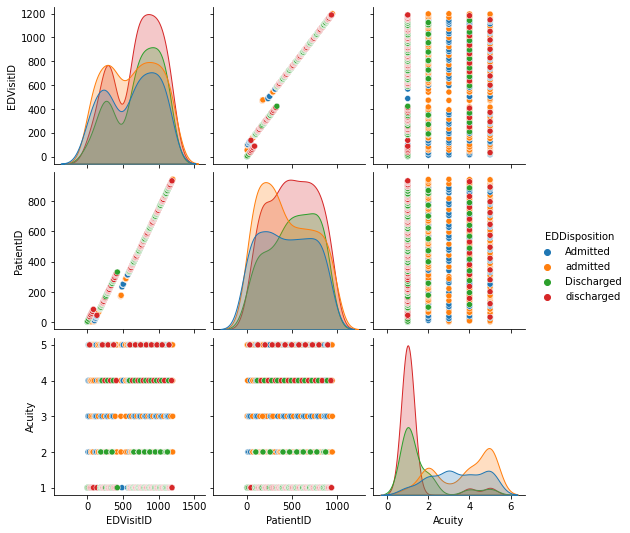

In [7]:
df=pd.read_excel("HospitalDatabase.xlsx",sheet_name="EDUnique")
df.head()
# pairplot with hue "EDDisposition"
sns.pairplot(df, hue ='EDDisposition')
# to show
plt.show()

In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date, datetime

## 8. Create a bar chart between expectedLOS & Primary diagnosis

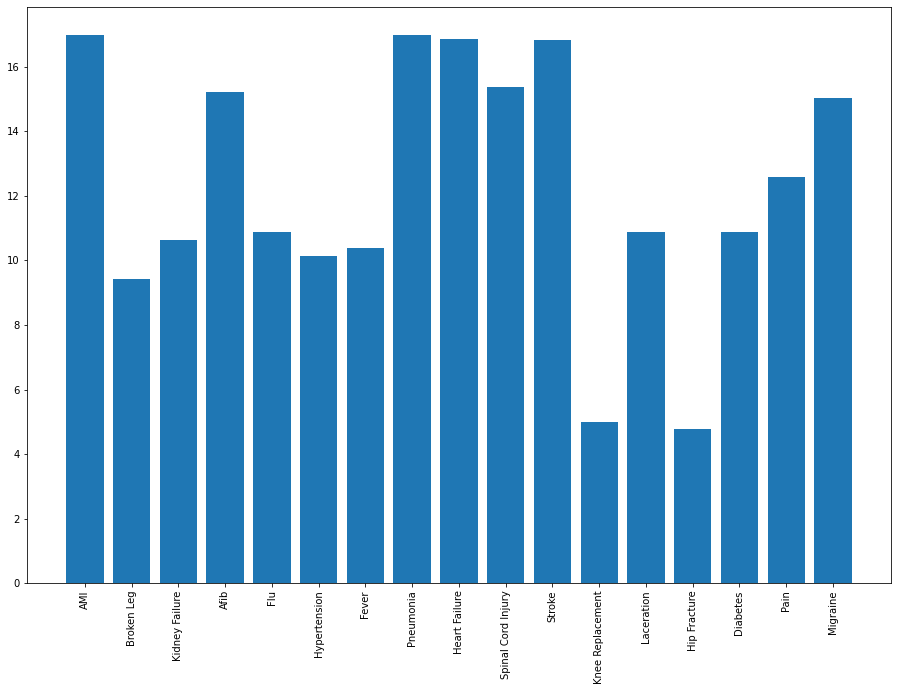

In [9]:
Discharges = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "Discharges")
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(Discharges["PrimaryDiagnosis"],Discharges["ExpectedLOS"])
plt.xticks(rotation = 'vertical')
plt.show()

## 9. Get the list of patient ids which are not there in ReadmissionRegistry¶|

In [10]:
Patients = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "Patients") 
ReAdmissionRegistry = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "ReAdmissionRegistry")
df1 = Patients.filter(["PatientID"],axis =1 )
df2 = ReAdmissionRegistry.filter(["PatientID"],axis =1 )
result = pd.concat([df1,df2]).drop_duplicates(keep=False)
print(list(result["PatientID"]))

[4, 135, 145, 189, 200, 224, 234, 374, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 414, 501, 562, 599, 690, 691, 704, 726, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 9

## 10. Create a boxplot on ExpectedLOS by taking service into account

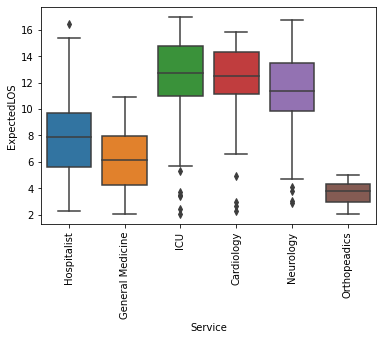

In [11]:
sns.boxplot( x=ReAdmissionRegistry["Service"], y=ReAdmissionRegistry["ExpectedLOS"] )
plt.xticks(rotation = 'vertical')
plt.show()

## 11. Create a pie chart by taking Service= ["Icu", "Neurology", "General", "Medicine"] & EcpectedLOS=[10,5,7,9] &explode the wedge with highest LOS

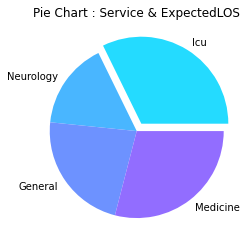

In [12]:
Service= ["Icu", "Neurology", "General", "Medicine"]
ExpectedLOS=[10,5,7,9]
explode = [0.1, 0, 0, 0]
palette_color = sns.color_palette('cool')
plt.pie(ExpectedLOS, labels=Service, colors=palette_color, explode=explode)
plt.title('Pie Chart : Service & ExpectedLOS')
plt.show()

## 12. Connect to sql and Write a query to get list of Provider names whose Providername is starting with letter T

In [13]:
import psycopg2 as pst
conn = pst.connect(database ='HospitalDatabase', user="postgres", password= "Dnayak@171290")
p_n = pd.read_sql_query("select providername from Providers where providername like 'T%';", con=conn)
p_n = pd.DataFrame(p_n)
print(p_n)
#list(p_n['providername'])

                                        providername
0  Ted Texas                                     ...
1  Ted Green                                     ...
2  Ted Black                                     ...
3  Tyler Conner                                  ...
4  Tony Creed                                    ...
5  Trent Tye                                     ...


## 13. Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach

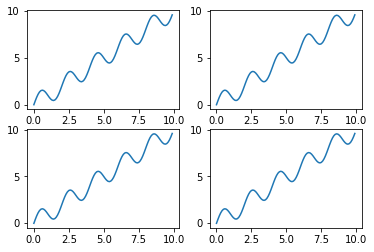

In [14]:
fig, ax = plt.subplots(2,2)
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x 
ax[0, 0].plot(x, y)
ax[0, 1].plot(x, y)
ax[1, 0].plot(x, y)
ax[1, 1].plot(x, y)
plt.show()

## 14. Find the number of null values in BloodPressureSystolic column

In [15]:
AmbulatoryVisits= pd.read_excel("HospitalDatabase.xlsx",sheet_name= "AmbulatoryVisits")
AmbulatoryVisits["BloodPressureSystolic"].isna().sum()

124

## 15. Replace all the null values in ReadmissionFlag with 0

In [16]:
df_R = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'ReAdmissionRegistry')
df_R['ReadmissionFlag'].fillna(0,inplace = True)
print(df_R['ReadmissionFlag'])

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
715    0.0
716    0.0
717    0.0
718    0.0
719    0.0
Name: ReadmissionFlag, Length: 720, dtype: float64


## 16. Plot a graph to show the distribution of expected length of stay


C:\Users\suhas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


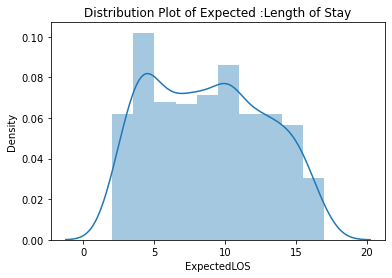

In [17]:
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = None)
df['ReAdmissionRegistry']['ExpectedLOS']
sns.distplot(df['ReAdmissionRegistry']['ExpectedLOS'])
plt.title('Distribution Plot of Expected :Length of Stay')
plt.show()

## 17.Create a heat map to show the correlation between the column values of Edvisits

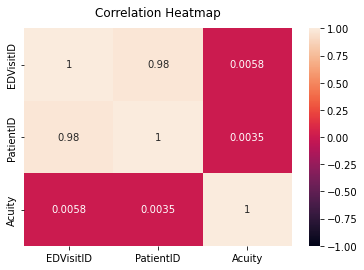

In [18]:
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = None)
heatmap = sns.heatmap(df['EDVisits'].corr(),vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

## 18. Add column 'Age' in Patient table

In [19]:
df_P = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'Patients')
current_dtme = datetime.now()
df_P["Age"] = round((current_dtme - df_P['DateOfBirth'])/np.timedelta64(1,'Y'),0).astype(np.int32)
print(df_P.head())

   PatientID FirstName LastName             DateOfBirth Gender   Race  \
0          1     Lanni      Sue 1960-01-01 00:00:00.000   Male  White   
1          2       Far    Myers 1985-11-15 02:08:42.090   Male  White   
2          3   Devlin   Michael 1976-04-15 02:52:09.762   Male  White   
3          4   Carmine    Texas 1968-10-15 03:32:13.635   Male  White   
4          5     Tann      Bama 1962-05-01 19:12:58.950   Male  White   

  Language  Age  
0  English   62  
1  English   37  
2  English   46  
3  English   54  
4  English   60  


## 19. Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet

In [20]:
df['ReAdmissionRegistry'].dtypes
d_time = pd.DatetimeIndex(df['ReAdmissionRegistry']['DischargeDate'])
df_dtime = pd.DataFrame(columns = ['date', 'time']) # Creating a new dataframe to store date & time values
df_dtime['date'] = d_time.date
df_dtime['time'] = d_time.time
print(df_dtime)


           date             time
0    2018-01-04  19:59:31.391000
1    2018-01-04  21:28:51.898000
2    2018-01-04  22:28:23.672000
3    2018-01-05  05:47:04.933000
4    2018-01-05  14:18:30.029000
..          ...              ...
715  2018-03-07  21:22:10.061000
716  2018-03-08  02:43:18.749000
717  2018-03-08  09:27:18.377000
718  2018-03-10  06:06:12.068000
719  2018-03-10  20:38:30.568000

[720 rows x 2 columns]


## 20. Count of number of patients admitted based on Primary Diagnosis and Service provided

In [21]:
df["ReAdmissionRegistry"].head()
pd_service = df["ReAdmissionRegistry"].groupby(['Service','PrimaryDiagnosis']).agg({"PatientID": 'count'})
print(pd_service)

                                     PatientID
Service          PrimaryDiagnosis             
Cardiology       AMI                        40
                 Afib                       10
                 Broken Leg                  3
                 Flu                         2
                 Heart Failure              39
                 Kidney Failure              1
General Medicine Broken Leg                  3
                 Diabetes                   38
                 Fever                      13
                 Flu                        54
                 Hypertension               35
                 Kidney Failure             12
                 Laceration                 21
                 Pneumonia                  67
                 Stroke                     20
Hospitalist      AMI                         1
                 Broken Leg                  3
                 Diabetes                   26
                 Fever                       3
             

## 21. Which demographic patients are prone to get stroke

In [22]:
Patients = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "Patients") 
now = datetime.now()
Patients["Age"] =(now - Patients['DateOfBirth'])/np.timedelta64(1,'Y')
Patients.head()
ReAdmissionRegistry = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "ReAdmissionRegistry")
df = pd.merge(Patients, ReAdmissionRegistry,how='inner',on=["PatientID"])
a = df[df["PrimaryDiagnosis"] == "Stroke"]
a["Race"].value_counts()

# Based on the output the race ,'Black/African-American' are more prone to get stroke

Black/African-American    40
White                     28
Name: Race, dtype: int64

## 22. Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value

In [23]:
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = None)

In [24]:
ed_acuity = df["EDVisits"].groupby(['EDDisposition', 'Acuity']).agg({"PatientID": 'count'})
print(ed_acuity)

                      PatientID
EDDisposition Acuity           
Admitted      1              32
              2             116
              3              81
              4             107
              5             179
Discharged    1             558
              2              66
              4              30
              5              30


## 23.Function to find the center element in the list. (1 element in odd length list, 2 elements in even length list)

In [25]:
def findCenter(l):
    if len(l)%2 != 0: # in case of odd length list
        return(l[int(len(l)/2)]) # will return single element
    else: # incase of even length list
        return(l[int(len(l)/2)-1],l[int(len(l)/2)]) # will return two elements
    
l = ['ab',1,2,'cde',5,6]
print(findCenter(l))

# l = [1,2,3,4,7] - # used case for odd length list
# findCenter(l)

# n = int(input("Enter number of elements in the list : "))
# l = list(map(input("Enter the elements of the list : ").strip().split(',')))[:n] # Enter elements separated by comma

(2, 'cde')


## 24. Get the count of number of patients based on ReasonForVisit and EDDisposition. Use stack/unstack functions


In [26]:
df_ED = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'EDVisits')


In [27]:
df_ED_pivot = df_ED.pivot_table(index = 'ReasonForVisit', columns = 'EDDisposition', values = 'PatientID', aggfunc='count').fillna(0)

In [28]:
print(df_ED_pivot)

EDDisposition        Admitted  Discharged
ReasonForVisit                           
Accident                 39.0         0.0
Bleeding                 16.0        15.0
Car Accident             17.0         0.0
Chest Pain               94.0        15.0
Cough                     0.0         1.0
Fever                    46.0       188.0
Gun Shot                 16.0         0.0
Intoxication              0.0        30.0
Laceration                0.0        30.0
Migraine                 47.0       109.0
Pneumonia               136.0        65.0
Shortness of Breath      72.0        77.0
Stomach Ache             32.0       154.0


In [29]:
df_ED_pivot.stack() # stack the levels from columns to rows

ReasonForVisit       EDDisposition
Accident             Admitted          39.0
                     Discharged         0.0
Bleeding             Admitted          16.0
                     Discharged        15.0
Car Accident         Admitted          17.0
                     Discharged         0.0
Chest Pain           Admitted          94.0
                     Discharged        15.0
Cough                Admitted           0.0
                     Discharged         1.0
Fever                Admitted          46.0
                     Discharged       188.0
Gun Shot             Admitted          16.0
                     Discharged         0.0
Intoxication         Admitted           0.0
                     Discharged        30.0
Laceration           Admitted           0.0
                     Discharged        30.0
Migraine             Admitted          47.0
                     Discharged       109.0
Pneumonia            Admitted         136.0
                     Discharged        65

In [30]:
df_ED_pivot
df_ED_pivot.unstack()

EDDisposition  ReasonForVisit     
Admitted       Accident                39.0
               Bleeding                16.0
               Car Accident            17.0
               Chest Pain              94.0
               Cough                    0.0
               Fever                   46.0
               Gun Shot                16.0
               Intoxication             0.0
               Laceration               0.0
               Migraine                47.0
               Pneumonia              136.0
               Shortness of Breath     72.0
               Stomach Ache            32.0
Discharged     Accident                 0.0
               Bleeding                15.0
               Car Accident             0.0
               Chest Pain              15.0
               Cough                    1.0
               Fever                  188.0
               Gun Shot                 0.0
               Intoxication            30.0
               Laceration              30

## 25.Plot a graph by counting the no. of patients in each department

In [31]:
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = None)

In [32]:
df['AmbulatoryVisits'].head()

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
0,202,840,29,2019-03-19,2019-03-13 07:59:24.000,10,Physical,188.0,144.143427,83.044920,No Show
1,436,820,25,2019-03-19,2019-02-24 07:10:31.043,3,Follow Up,179.0,118.876808,90.309544,No Show
2,794,879,30,2019-04-02,2019-03-19 01:41:55.656,11,Telemedicine,133.0,98.749563,80.859776,No Show
3,799,884,37,2019-03-03,2019-02-25 01:25:39.696,4,Telemedicine,132.0,98.001270,82.184737,No Show
4,515,32,26,2019-03-16,2019-02-20 06:44:59.617,11,Telemedicine,131.0,85.115632,89.192362,No Show


[Text(0.5, 1.0, 'Department wise total count of patients')]


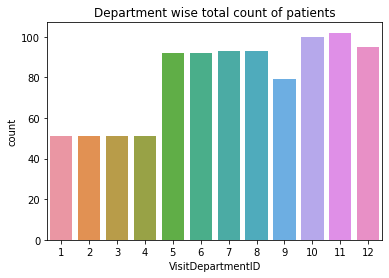

In [33]:
print(sns.countplot(x= df['AmbulatoryVisits']['VisitDepartmentID']).set(title = 'Department wise total count of patients' ))

## 26. Using Arrays and Loops, find the count of of patients based on gender

In [34]:
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = None)
df['Patients'].head() # check the first few records

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English


In [35]:
type(df['Patients']['Gender']) # check type of dataframe column

pandas.core.series.Series

In [36]:
g_array = df['Patients']['Gender'].to_numpy() # converting gender column to array

In [37]:
g_array.shape # checking numberof records in array

(945,)

In [38]:
count_m=0
count_f=0
for val in g_array:
    if val=="Male":
        count_m += 1
    else:
        count_f += 1
print('Total Male Patients:' ,count_m)
print('Total Female Patients:' ,count_f)    
        

Total Male Patients: 537
Total Female Patients: 408


## 27.Plot a graph to count the patients based on discharge disposition


In [39]:
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = None)
df['ReAdmissionRegistry'].head()

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN


In [40]:
dis_count = df['ReAdmissionRegistry']['DischargeDisposition'].value_counts()
dis_count

Home        577
Expired     104
Transfer     39
Name: DischargeDisposition, dtype: int64

[Text(0.5, 1.0, 'Count of Patients based on Discharge Disposition')]

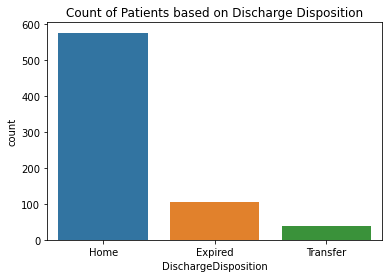

In [41]:
sns.countplot(x= df['ReAdmissionRegistry']['DischargeDisposition']).set(title = 'Count of Patients based on Discharge Disposition')

## 28. Which reason of visit has maximum mortality rate

In [42]:
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = None)
newdf_1 = df['Discharges'].filter(['PatientID', 'DischargeDisposition'])
newdf_2 = df['EDVisits'].filter(['PatientID','ReasonForVisit'])
newdf_3 = pd.merge(newdf_1, newdf_2, on='PatientID')
len(newdf_1), len(newdf_2), len(newdf_3)
# new_df_3.groupby(['DischargeDisposition','ReasonForVisit']).count()

(720, 1199, 983)

In [43]:
newdf_4= newdf_3.groupby(['DischargeDisposition']).get_group("Expired")
#newdf_4
newdf_5 = newdf_4.groupby(['ReasonForVisit','DischargeDisposition']).count().sort_values("PatientID", ascending = False)
newdf_5.head()
# Fever has the max mortality count

# PS: The count changes with the use of EDUnique sheet

,,PatientID
ReasonForVisit,DischargeDisposition,
Fever,Expired,25
Stomach Ache,Expired,23
Pneumonia,Expired,19
Migraine,Expired,14
Chest Pain,Expired,12


## 29. Calculate average LOS

In [44]:
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = None)
df['Discharges'].head()

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
0,1,9,2018-01-01,2018-01-07 18:06:06.408,Expired,Cardiology,AMI,9.646857,0.061540
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Expired,Cardiology,Broken Leg,6.816558,0.628827
2,152,101,2018-01-07,2018-01-11 16:16:06.782,Expired,Cardiology,Kidney Failure,6.580273,0.573887
3,361,102,2018-01-07,2018-01-15 04:48:33.134,Expired,Cardiology,Afib,12.794536,0.222163
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Expired,Cardiology,Broken Leg,2.639297,0.055468


In [45]:
df['Discharges']['LOS']= (df['Discharges']['DischargeDate'] - df['Discharges']['AdmissionDate']).dt.days
# calculates the difference between dates in days

In [46]:
print(round(df['Discharges']['LOS'].mean(),2)) # Average LOS

9.53


## 30.Which patientid has most entries in readmission registry

In [47]:
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = None)
print(df['ReAdmissionRegistry']['PatientID'].value_counts()[0:1])
# Patient ID 23 has the most entries in the readmission registry

23    3
Name: PatientID, dtype: int64


## 31. Find count of White Spanish Male


In [48]:
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = None)
men_white = df['Patients'][(df['Patients']['Gender'] == 'Male') & (df['Patients']['Race'] == 'White') & (df['Patients']['Language']== 'Spanish')].agg({'PatientID':'count'})
print(men_white) # Count of White Spanish Male = 15

PatientID    15
dtype: int64


## 32. Write a function to print the table of the given number

In [49]:
n = int(input('Enter a number:' )) 
count = 1
while count <= 10:
    n = n*1
    print(n, 'x', count, '=', n*count)
    count += 1

Enter a number:5
5 x 1 = 5
5 x 2 = 10
5 x 3 = 15
5 x 4 = 20
5 x 5 = 25
5 x 6 = 30
5 x 7 = 35
5 x 8 = 40
5 x 9 = 45
5 x 10 = 50


## 33. Using a bar chart, which Service had the lowest count of Expected Mortality?

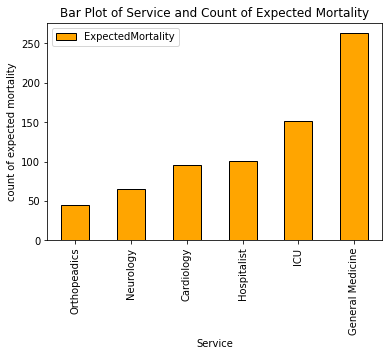

In [50]:
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = None)
exp_mor = df['Discharges'].groupby(['Service']).agg({'ExpectedMortality': 'count'}).sort_values('ExpectedMortality', ascending = True)
exp_mor.plot.bar(color = 'orange', edgecolor = 'black')
plt.title('Bar Plot of Service and Count of Expected Mortality')
plt.xlabel('Service')
plt.ylabel('count of expected mortality')
plt.show()

# Orthopeadics has the lowest count of expected mortality

## 34. np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17

In [51]:
x = np.arange(1,31).reshape(6,5)
print(x[2:4,0:2])

[[11 12]
 [16 17]]


## 35. np.arange(1,31).reshape(6,5), find array slicing for elements 2,8,14,20

In [52]:
y = np.arange(1,31).reshape(6,5)
y
print(np.diag(y, k = 1))

[ 2  8 14 20]


## 36.Create a correlation matrix on EDVisits

In [53]:
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = None)
cor_matrix = df['EDVisits'].corr()
print(cor_matrix)

           EDVisitID  PatientID    Acuity
EDVisitID   1.000000   0.975477  0.005813
PatientID   0.975477   1.000000  0.003545
Acuity      0.005813   0.003545  1.000000


## 37.Write a function to print all the upper case letter of a given sentence

In [109]:
sample = input('Enter a sentence:')
print(sample.upper())

Enter a sentence:python
PYTHON


## 38. Number of patients on 'Transfer' based on primary diagnosis

In [55]:
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = None)
df_t = df['ReAdmissionRegistry'].groupby(['DischargeDisposition']).get_group ('Transfer') # group by using DischargeDisposition
df_p = df_t.groupby(['PrimaryDiagnosis']).agg({'PatientID': 'count'}).sort_values('PatientID', ascending = True) # group by using PrimaryDiagnosis
print(df_p)
# Total no. of patients = 39

                  PatientID
PrimaryDiagnosis           
Afib                      1
Knee Replacement          1
Laceration                1
Pain                      1
Flu                       2
Diabetes                  7
Pneumonia                 8
Heart Failure             9
Stroke                    9


## 39. Get the FirstName, LastName,DateOfBirth of the Patients whose reason for visit is Migraine. Use EDUnique Sheet for reason for visit

In [56]:
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = None)
new_pat = df['Patients'].filter(['PatientID','FirstName','LastName', 'DateOfBirth'], axis = 1)
#print(new_pat.head())
new_ed = df['EDUnique'].filter(['PatientID','ReasonForVisit'], axis = 1)
# print(new_ed.head())
new_merge= pd.merge(new_pat, new_ed, on = 'PatientID')
# print(new_merge.head())

# Deriving patients who visited for Migraine
pat_mig = new_merge[new_merge['ReasonForVisit']== 'Migraine']
print(pat_mig.drop(columns = ['ReasonForVisit', 'PatientID']))
# 116 patients whose reason of visit was Migraine

    FirstName  LastName             DateOfBirth
1         Far     Myers 1985-11-15 02:08:42.090
2     Devlin    Michael 1976-04-15 02:52:09.762
11     Zonnya        Ab 1963-05-23 10:04:33.074
13        Gan        Yu 1970-06-02 06:22:54.675
21     Joesph      Long 1979-12-04 16:45:56.080
..        ...       ...                     ...
896   Barrows  Coupland 1979-10-31 18:28:35.483
907      Knox     Group 1975-08-25 22:27:50.177
909   Kuvalis  Coupland 1986-05-23 19:23:27.752
914  Jerrilyn     Dyson 1978-01-18 02:41:55.178
923    Daniel  Shakesby 1980-11-28 17:57:03.702

[116 rows x 3 columns]


## 40. Plot a graph showing the count of patients for the reason visited the hospotal.

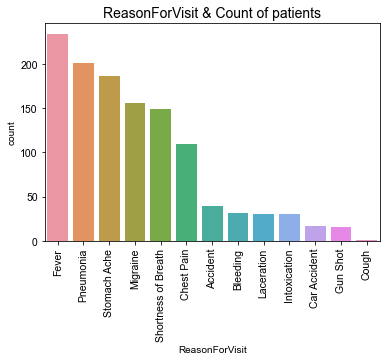

In [57]:
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = None)
sns.countplot(x = 'ReasonForVisit', data = df['EDVisits'], order= df['EDVisits']['ReasonForVisit'].value_counts().index).set(title = 'ReasonForVisit & Count of patients')
sns.set(rc={'figure.figsize':(17,12)})
plt.title('ReasonForVisit & Count of patients', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10.5)
plt.xticks(rotation = 'vertical')
plt.show()

In [58]:
df['EDVisits'].groupby(['ReasonForVisit'])['PatientID'].count().sort_values(ascending = True)

ReasonForVisit
Cough                    1
Gun Shot                16
Car Accident            17
Intoxication            30
Laceration              30
Bleeding                31
Accident                39
Chest Pain             109
Shortness of Breath    149
Migraine               156
Stomach Ache           186
Pneumonia              201
Fever                  234
Name: PatientID, dtype: int64

## Question 41 - 60

In [59]:
import pandas as pd
import re
from datetime import datetime, date
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 41. Find the visit type with maximum 'No Show'

In [60]:
AmbulatoryVisits = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "AmbulatoryVisits")
AmbulatoryVisits.head()
max_count = AmbulatoryVisits[AmbulatoryVisits["VisitStatus"]=="No Show"]
max_count["VisitType"].value_counts()[:1]

Telemedicine    74
Name: VisitType, dtype: int64

## 42.Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery

In [61]:
Providers = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "Providers")
Providers_fil = Providers[Providers["ProviderSpecialty"]=="Surgery"]
Providers_fil.head()
Providers_fil.loc[10:19]

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
10,11,Kim Kimberly,Surgery,1998-05-10 14:47:29.468
11,12,Sarah Ab,Surgery,1998-08-18 05:22:40.762
12,13,Abigail Marriot,Surgery,1998-11-08 12:25:45.705
13,14,Dave Yu,Surgery,1999-06-26 16:18:57.436
14,15,Christian Saint,Surgery,2000-08-27 00:12:40.326
15,16,Perry Pardon,Surgery,2001-02-13 11:49:17.862


## 43. Write a regular expression to find all the digits and numbers in the string

In [62]:
str = 'We live at 9-162 magnolia. My phone number is 666688888.'
x = re.findall('[0-9]+', str)
print(x)

['9', '162', '666688888']


## 44. Create a pivot table displaying average LOS based on Service and Primary Diagnosis

In [63]:
ReAdmissionRegistry = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "ReAdmissionRegistry")
ReAdmissionRegistry["LOS"]= ReAdmissionRegistry["DischargeDate"] - ReAdmissionRegistry["AdmissionDate"]
ReAdmissionRegistry.pivot_table(index=["Service"], columns=["PrimaryDiagnosis"], values=["LOS"],aggfunc="mean")

LOS                          \
PrimaryDiagnosis                     AMI                    Afib   
Service                                                            
Cardiology       10 days 17:50:17.068400 11 days 16:43:04.519200   
General Medicine                     NaT                     NaT   
Hospitalist      10 days 00:30:31.743000                     NaT   
ICU              12 days 14:59:32.471600  6 days 22:18:35.647000   
Neurology         9 days 07:53:41.872500                     NaT   
Orthopeadics                         NaT                     NaT   

                                                                        \
PrimaryDiagnosis                 Broken Leg                   Diabetes   
Service                                                                  
Cardiology       10 days 22:44:11.476333333                        NaT   
General Medicine 13 days 06:02:10.045666666 10 days 20:03:59.416736842   
Hospitalist       8 days 06:38:49.924666666  9 days 07:46:16.835153846   
ICU                                     NaT                        NaT   
Neurology                               NaT                        NaT   
Orthopeadics                            NaT                        NaT   

                                                                        \
PrimaryDiagnosis                      Fever                        Flu   
Service                                                                  
Cardiology                              NaT    12 days 10:08:21.363000   
General Medicine  8 days 11:16:36.716307692 10 days 10:02:10.029796296   
Hospitalist      10 days 21:50:58.966666666  9 days 05:05:03.015473684   
ICU                 13 days 22:11:21.610000  8 days 09:49:41.249333333   
Neurology                               NaT     7 days 19:17:45.169000   
Orthopeadics                            NaT                        NaT   

                                                                       \
PrimaryDiagnosis              Heart Failure              Hip Fracture   
Service                                                                 
Cardiology        9 days 22:33:05.353871794                       NaT   
General Medicine                        NaT                       NaT   
Hospitalist                             NaT                       NaT   
ICU               9 days 22:36:01.571181818                       NaT   
Neurology        13 days 14:46:28.502166666                       NaT   
Orthopeadics                            NaT 9 days 17:32:33.319695652   

                                                                        \
PrimaryDiagnosis               Hypertension             Kidney Failure   
Service                                                                  
Cardiology                              NaT     4 days 16:16:06.782000   
General Medicine  9 days 11:41:31.025285714    11 days 04:34:51.031000   
Hospitalist      11 days 07:55:37.157333333 10 days 14:39:50.273666666   
ICU                  8 days 20:04:45.589750    11 days 13:33:12.198000   
Neurology            9 days 18:36:03.262200                        NaT   
Orthopeadics                            NaT                        NaT   

                                                                      \
PrimaryDiagnosis          Knee Replacement                Laceration   
Service                                                                
Cardiology                             NaT                       NaT   
General Medicine                       NaT 9 days 22:50:48.247238095   
Hospitalist         6 days 16:40:18.171000 9 days 13:37:12.731714285   
ICU                                    NaT   15 days 06:58:47.690000   
Neurology                              NaT                       NaT   
Orthopeadics     9 days 21:53:09.485727272                       NaT   

                                                                    \
PrimaryDiagnosis                  Migraine    

## 45. Calculate mortality by diagnosis

In [64]:
ReAdmissionRegistry = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "ReAdmissionRegistry")
Mortality_Diag = ReAdmissionRegistry[ReAdmissionRegistry["DischargeDisposition"]=="Expired"]
Mortality_Diag.groupby(["DischargeDisposition","PrimaryDiagnosis"])["PatientID"].count()

DischargeDisposition  PrimaryDiagnosis  
Expired               AMI                    6
                      Afib                   4
                      Broken Leg             3
                      Diabetes               9
                      Fever                  4
                      Flu                   11
                      Heart Failure         16
                      Hip Fracture           3
                      Hypertension          16
                      Kidney Failure         2
                      Knee Replacement       2
                      Laceration             2
                      Pain                   1
                      Pneumonia             16
                      Spinal Cord Injury     2
                      Stroke                 7
Name: PatientID, dtype: int64

## 46. Write a code to split a sentence into words using regex

In [65]:
text = """
She _ s so * nice!
split a sentence into words
"""
matches = re.findall(r'[A-Za-z]+|[^A-Za-z \n ]', text)
print(matches)

['She', '_', 's', 'so', '*', 'nice', '!', 'split', 'a', 'sentence', 'into', 'words']


## 47. Using indexing ,loc ,retrieve the row with maximum BloodPressureSystolic

## Index

In [66]:
AmbulatoryVisits = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "AmbulatoryVisits")
max_value = AmbulatoryVisits["BloodPressureSystolic"].max()
AmbulatoryVisits[AmbulatoryVisits["BloodPressureSystolic"]== max_value]

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
236,933,884,27,2019-02-14,2019-01-22 19:26:49.163,12,Telemedicine,190.0,143.989174,74.976879,Completed
251,888,906,24,2019-03-31,2019-03-17 23:21:17.361,10,New,190.0,137.207999,52.666922,Completed
424,314,63,7,2019-04-05,2019-03-24 22:31:26.092,11,Telemedicine,190.0,121.539859,95.471260,Completed
432,740,892,31,2019-03-14,2019-03-11 15:08:33.963,8,Physical,190.0,145.343479,94.849021,Completed
677,929,880,23,2019-02-10,2019-01-22 13:32:14.549,8,Follow Up,190.0,144.313400,82.781940,Completed
869,839,857,12,2019-03-17,2019-02-23 09:05:43.676,8,Follow Up,190.0,130.997386,71.829542,Completed
934,482,866,14,2019-05-04,2019-04-13 07:54:49.580,5,New,190.0,124.736359,69.731779,Canceled


## Loc

In [67]:
max_value = AmbulatoryVisits["BloodPressureSystolic"].max()
AmbulatoryVisits.loc[AmbulatoryVisits["BloodPressureSystolic"] == max_value]

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
236,933,884,27,2019-02-14,2019-01-22 19:26:49.163,12,Telemedicine,190.0,143.989174,74.976879,Completed
251,888,906,24,2019-03-31,2019-03-17 23:21:17.361,10,New,190.0,137.207999,52.666922,Completed
424,314,63,7,2019-04-05,2019-03-24 22:31:26.092,11,Telemedicine,190.0,121.539859,95.471260,Completed
432,740,892,31,2019-03-14,2019-03-11 15:08:33.963,8,Physical,190.0,145.343479,94.849021,Completed
677,929,880,23,2019-02-10,2019-01-22 13:32:14.549,8,Follow Up,190.0,144.313400,82.781940,Completed
869,839,857,12,2019-03-17,2019-02-23 09:05:43.676,8,Follow Up,190.0,130.997386,71.829542,Completed
934,482,866,14,2019-05-04,2019-04-13 07:54:49.580,5,New,190.0,124.736359,69.731779,Canceled


## 48. Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy)

In [68]:
ReAdmissionRegistry = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "ReAdmissionRegistry")
ReAdmissionRegistry["LOS"]= ReAdmissionRegistry["DischargeDate"] - ReAdmissionRegistry["AdmissionDate"]
ReAdmissionRegistry.head()
ReAdmissionRegistry.groupby(["DischargeDisposition","Service"])["LOS"].mean()

DischargeDisposition  Service         
Expired               Cardiology          9 days 08:35:16.352066666
                      General Medicine    8 days 23:20:11.814888888
                      Hospitalist           10 days 14:06:42.815200
                      ICU                 9 days 18:58:35.305965517
                      Neurology          10 days 15:37:05.725148148
                      Orthopeadics          12 days 07:51:48.451200
Home                  Cardiology            10 days 15:12:46.317720
                      General Medicine   10 days 07:09:33.605737991
                      Hospitalist         9 days 12:31:51.489784090
                      ICU                 9 days 13:48:53.376454545
                      Neurology           9 days 16:15:31.363138888
                      Orthopeadics        9 days 07:48:01.454282051
Transfer              Cardiology            11 days 18:14:12.311200
                      General Medicine   11 days 01:49:20.759312500
         

## 49. Create a jointplot between expected mortality & expected length of stay

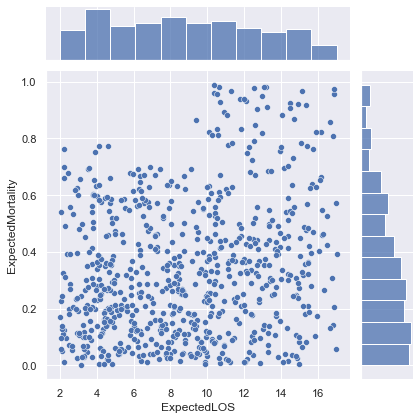

In [69]:
ReAdmissionRegistry = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "ReAdmissionRegistry")
sns.jointplot(x = "ExpectedLOS", y = "ExpectedMortality", kind = "scatter", data = ReAdmissionRegistry)
plt.show()

## 50. Which departmentID has maximum number of visits scheduled.

In [70]:
max_visit_schedule = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "AmbulatoryVisits")
max_visit_schedule.head()
max_visit_schedule["VisitDepartmentID"].value_counts()[:1]

11    102
Name: VisitDepartmentID, dtype: int64

## 51. Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.

In [71]:
EDUnique = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "EDUnique")
EDUnique.head()
EDUnique[(EDUnique["ReasonForVisit"].isin(["Migraine","Pneumonia"])) & (EDUnique["Acuity"] >= 2)]

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted
11,29,29,2020-01-01 06:51:28.639,2020-01-02 05:57:01.639,2,Pneumonia,Admitted
12,30,30,2020-01-01 07:25:54.177,2020-01-01 23:30:20.151,3,Pneumonia,Admitted
13,31,31,2020-01-01 07:32:51.917,2020-01-01 19:55:46.991,4,Pneumonia,Admitted
...,...,...,...,...,...,...,...
853,1027,773,2020-01-13 15:27:07.001,2020-01-14 13:27:31.778,2,Migraine,Discharged
896,1104,850,2020-01-14 10:46:08.650,2020-01-14 20:52:26.031,2,Migraine,Discharged
898,1106,852,2020-01-14 11:19:41.401,2020-01-15 02:47:17.353,2,Migraine,Discharged
906,1122,868,2020-01-14 15:05:58.777,2020-01-15 13:53:02.550,2,Migraine,Discharged


## 52. Retrieve the row with minimum DBP using sorting technique

In [72]:
AmbulatoryVisits = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "AmbulatoryVisits")
df_sort = AmbulatoryVisits.sort_values(by=["BloodPressureDiastolic"])
df_sort.head(1)

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
757,163,801,11,2019-02-08,2019-02-07 23:41:12.181,7,Follow Up,120.0,51.695653,53.310495,Completed


## 53. Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit

In [73]:
def reasoncount(reason):
    EDUnique = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "EDUnique")
    displaycount = EDUnique[EDUnique["ReasonForVisit"]== reason]["ReasonForVisit"].count()
    print(displaycount)
    
    
    
def  EnterReason():
    reason = input("Enter Reason for visit :")
    reasoncount(reason)
    
EnterReason() 

Enter Reason for visit :Chest Pain
91


## 54. Mortality O.E

In [74]:
ReAdmissionRegistry = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "ReAdmissionRegistry")
sum_of_mortality = (ReAdmissionRegistry[ReAdmissionRegistry["DischargeDisposition"]=="Expired"]["DischargeDisposition"].count())
sum_of_mortality / (ReAdmissionRegistry["ExpectedMortality"].sum())

0.4272709474250124

## 55. Create a bar chart on service & expected length of stay

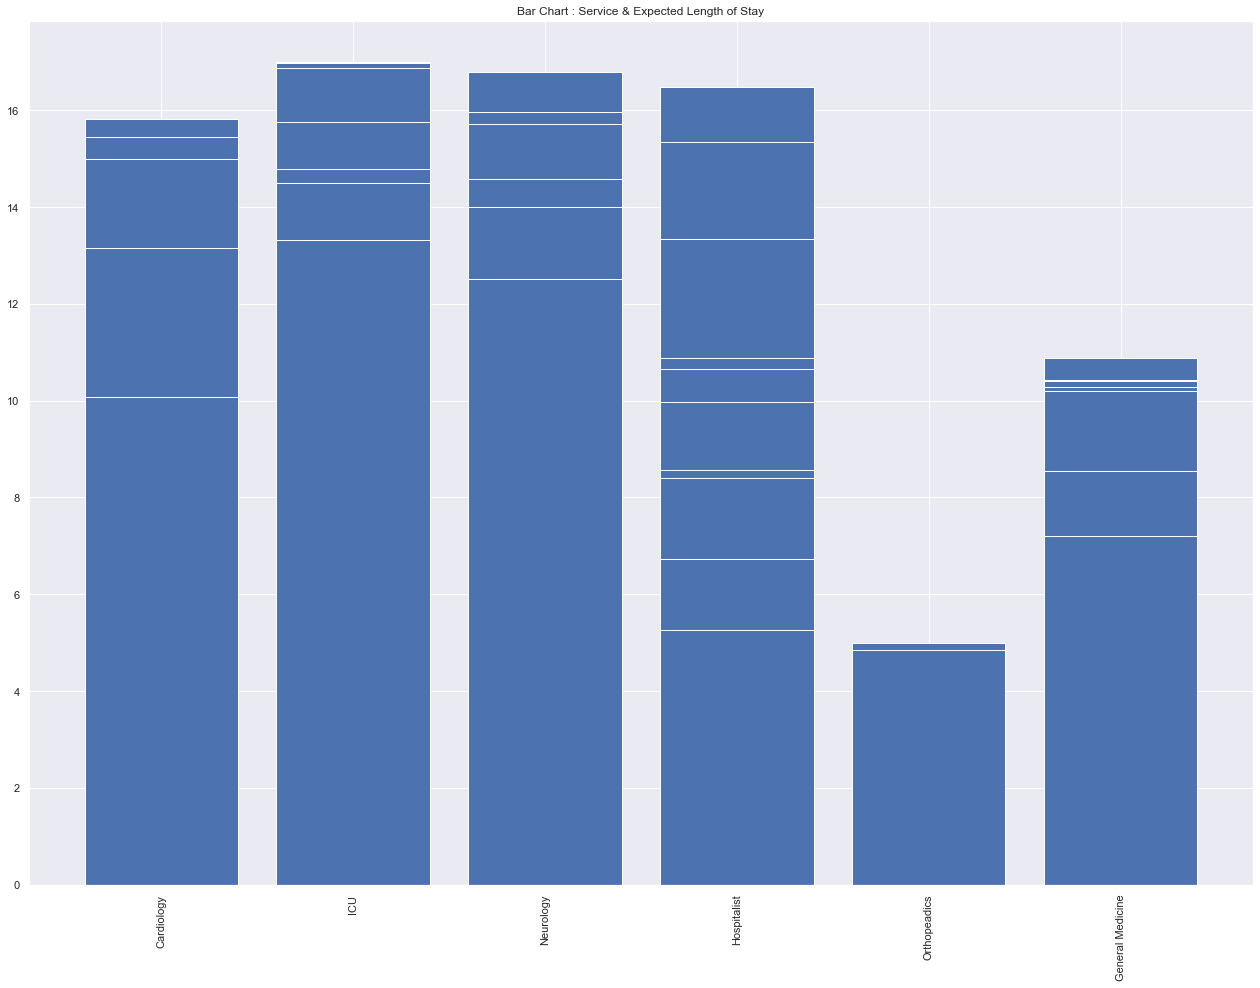

In [75]:
Discharges = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "Discharges")

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(Discharges["Service"],Discharges["ExpectedLOS"])
plt.title("Bar Chart : Service & Expected Length of Stay")
plt.xticks(rotation = 'vertical')
plt.show()


## 56. Count of canceled status

In [76]:
AmbulatoryVisits = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "AmbulatoryVisits")
AmbulatoryVisits.groupby(["VisitStatus"])["VisitID"].count()[:1]

VisitStatus
Canceled    60
Name: VisitID, dtype: int64

## 57. Find the age prone to get stroke

In [77]:
Patients = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "Patients") 
now = datetime.now()
Patients["Age"] =(now - Patients['DateOfBirth'])/np.timedelta64(1,'Y')
Patients.head()
ReAdmissionRegistry = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "ReAdmissionRegistry")
df = pd.merge(Patients, ReAdmissionRegistry,how='inner',on=["PatientID"])
a = df[df["PrimaryDiagnosis"] == "Stroke"]
min_val = a["Age"].min()
max_val = a["Age"].max()
print("Age prone to get stroke between {0} and {1}".format(min_val,max_val))

Age prone to get stroke between 35.49181664991749 and 62.13721093384579


## 58. Display total count of patients service wise based on gender

In [78]:
Patients = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "Patients") 
Discharges = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "Discharges")
df = pd.merge(Patients, Discharges,how='inner',on=["PatientID"])
df.groupby(["Service","Gender"])["PatientID"].count()

Service           Gender
Cardiology        Female     41
                  Male       54
General Medicine  Female    114
                  Male      149
Hospitalist       Female     35
                  Male       66
ICU               Female     65
                  Male       86
Neurology         Female     34
                  Male       31
Orthopeadics      Female     22
                  Male       23
Name: PatientID, dtype: int64

## 59. Create a dataframe by splitting provider name to firstname and lastname with names for the columns

In [79]:
df = pd.read_excel("HospitalDatabase.xlsx",sheet_name="Providers")
df[['Firstname','Lastname']] = df["ProviderName"].str.split(expand=True)
df.head()

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff,Firstname,Lastname
0,1,Sally Sue,Pediatrics,1993-01-01 00:00:00.000,Sally,Sue
1,2,Mike Myers,Pediatrics,1993-05-02 00:00:17.695,Mike,Myers
2,3,Jordan Michael,Pediatrics,1993-06-24 21:31:46.687,Jordan,Michael
3,4,Ted Texas,Pediatrics,1993-12-23 21:33:52.299,Ted,Texas
4,5,Ala Bama,Pediatrics,1995-01-10 02:53:47.838,Ala,Bama


## 60. Predict the output of the program..

In [80]:
class Acc: 
    def __init__(self, id): 
        self.id = id
        id = 555 
       
    
acc = Acc(111) 
print(acc.id)
print("""
self represents the instance of the class. By using the “self”  
we can access the attributes and methods of the class in python. 
It binds the attributes with the given arguments.""")

111

self represents the instance of the class. By using the “self”  
we can access the attributes and methods of the class in python. 
It binds the attributes with the given arguments.


In [81]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
from datetime import date,datetime

## 61. Show a graph by multiplotting on the same canvas

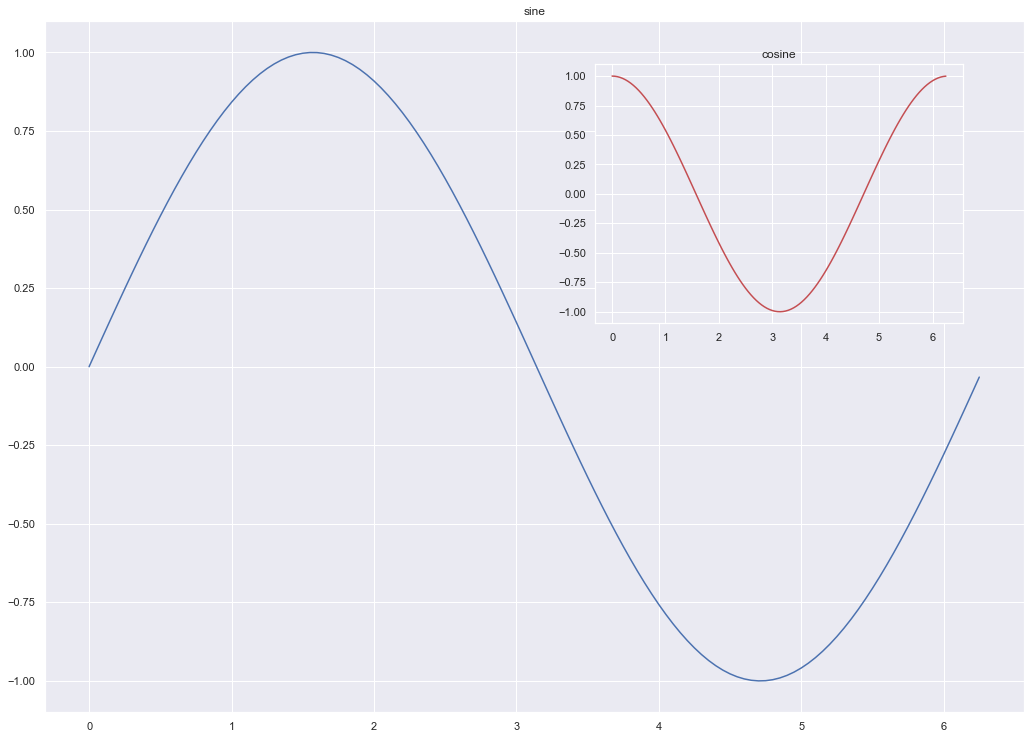

In [82]:
x = np.arange(0, math.pi*2, 0.05)
fig=plt.figure()
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.55, 0.55, 0.3, 0.3]) # inset axes
y = np.sin(x)
axes1.plot(x, y, 'b')
axes2.plot(x,np.cos(x),'r')
axes1.set_title('sine')
axes2.set_title("cosine")
plt.show()

## 62.Display the data for all 'White Female' patients above the age of 50

In [83]:
df=pd.read_excel("HospitalDatabase.xlsx",sheet_name="Patients") #, na_values=["n.a.", "not avaliable",-1],parse_dates=["DateOfBirth"]
df
now = datetime.now()
print(now)
df["Age"] =(now - df['DateOfBirth'])/np.timedelta64(1,'Y') 
df.sort_values("Age")
df.sort_values("Age",ascending=True)
df.loc[(df['Gender'] =='Female') & (df['Race'] == 'White')  & (df['Age'] > 50)]

2022-05-24 13:36:57.976800


,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
28,29,Ted,Scott,1967-12-09 05:01:37.892,Female,White,Spanish,54.457950
30,31,Harry,Ding,1960-10-08 01:42:51.212,Female,White,Spanish,61.626169
33,34,Ted,Hue,1960-11-28 18:05:11.459,Female,White,Spanish,61.484668
34,35,Fred,Tye,1966-04-14 06:01:07.169,Female,White,Spanish,56.111533
39,40,Christian,Pow,1971-12-07 11:47:43.885,Female,White,Spanish,50.462572
...,...,...,...,...,...,...,...,...
865,866,Jermayne,Lowndes,1970-12-09 04:49:48.933,Female,White,English,51.457227
866,867,Gail,Inc,1967-03-10 08:18:47.908,Female,White,English,55.207762
867,868,Des,Heindrick,1969-08-15 11:05:30.165,Female,White,English,52.773446
869,870,Hauck,Rubbens,1963-11-16 03:31:38.929,Female,White,English,58.521175


## 63.Using loc, retrieve the firstname and lastname of patients between indices 101 and 200

In [84]:
df=pd.read_excel("HospitalDatabase.xlsx",sheet_name="Patients")
df.loc[101:200,"FirstName":"LastName"]

,FirstName,LastName
101,Gipsy,Frankton
102,Jethro,Wharin
103,Viv,Aylward
104,Swift,Dreschler
105,Fadel,Jacquemard
...,...,...
196,Noam,Laguerre
197,Arie,Bayless
198,Janaye,O'Mohun
199,Fonz,Group


## 64."Using numpy functions, multiply the following arraysa=np.arange(6).reshape(2,3), b=np.arange(6).reshape(3,2)"

In [85]:
array = np.arange(6)
print("Original array : \n", array)
array = np.arange(6).reshape(2, 3)
print("\narray reshaped with 2 rows and 3 columns : \n", array)
array = np.arange(6).reshape(3 ,2)
print("\narray reshaped with 3 rows and 2 columns : \n", array)


Original array : 
 [0 1 2 3 4 5]

array reshaped with 2 rows and 3 columns : 
 [[0 1 2]
 [3 4 5]]

array reshaped with 3 rows and 2 columns : 
 [[0 1]
 [2 3]
 [4 5]]


## 65. Get the count of number of patients based on service and primary diagnosis

In [86]:
df=pd.read_excel("HospitalDatabase.xlsx",sheet_name="ReAdmissionRegistry")
df.loc[:,"Service":"PrimaryDiagnosis"]
df_pivot = df.pivot_table(index = 'Service', columns = 'PrimaryDiagnosis', values = 'PatientID', aggfunc='count').fillna(0)
print(df_pivot.count())

PrimaryDiagnosis
AMI                   6
Afib                  6
Broken Leg            6
Diabetes              6
Fever                 6
Flu                   6
Heart Failure         6
Hip Fracture          6
Hypertension          6
Kidney Failure        6
Knee Replacement      6
Laceration            6
Migraine              6
Pain                  6
Pneumonia             6
Spinal Cord Injury    6
Stroke                6
dtype: int64


## 66. np.arange(1,31).reshape(6,5), find array slicing to get the elements 4,5,24,25,29,30

In [87]:
# Python Program illustrating
# numpy.reshape() method
 
import numpy as np
 
array = np.arange(1,31)
print("Original array : \n", array)
 
# shape array with 6 rows and 5 columns
array = np.arange(1,31).reshape(6, 5)
print("\narray reshaped with 6 rows and 5 columns : \n", array)

print(array[:1,3:])
print(array[4:5,3:])
print(array[-1,3:])
 


Original array : 
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

array reshaped with 6 rows and 5 columns : 
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]
[[4 5]]
[[24 25]]
[29 30]


## 67.Make a pivot table by counts the no. of patients from the admission date till discharge date

In [88]:
df=pd.read_excel("HospitalDatabase.xlsx",sheet_name="Discharges")
df.pivot_table(values = "PatientID" ,index="DischargeDate" ,columns = "AdmissionDate",aggfunc="count")
df.groupby(["DischargeDate","AdmissionDate"])["PatientID"].count()

DischargeDate            AdmissionDate
2018-01-04 19:59:31.391  2018-01-01       1
2018-01-04 21:28:51.898  2018-01-01       1
2018-01-04 22:28:23.672  2018-01-01       1
2018-01-05 02:40:20.756  2018-01-02       1
2018-01-05 05:47:04.933  2018-01-01       1
                                         ..
2018-03-09 00:57:07.978  2018-02-21       1
2018-03-09 07:07:45.088  2018-02-21       1
2018-03-09 07:37:01.872  2018-02-21       1
2018-03-10 06:06:12.068  2018-02-22       1
2018-03-10 20:38:30.568  2018-02-22       1
Name: PatientID, Length: 720, dtype: int64

## 68.Display the data where actual LOS is greater than expected LOS

In [89]:
df=pd.read_excel("HospitalDatabase.xlsx",sheet_name="ReAdmissionRegistry",usecols="C,D,H")
df
df['ActualLOS'] = (df['DischargeDate'] - df['AdmissionDate'])/np.timedelta64(1,'D')

df.query('ActualLOS > ExpectedLOS')

,AdmissionDate,DischargeDate,ExpectedLOS,ActualLOS
1,2018-01-01,2018-01-04 21:28:51.898,3.825969,3.895045
2,2018-01-01,2018-01-04 22:28:23.672,3.382493,3.936385
3,2018-01-01,2018-01-05 05:47:04.933,3.763352,4.241029
10,2018-01-01,2018-01-09 09:21:47.300,7.162811,8.390131
11,2018-01-01,2018-01-09 21:34:42.467,4.554479,8.899103
...,...,...,...,...
715,2018-02-22,2018-03-07 21:22:10.061,13.725405,13.890394
716,2018-02-22,2018-03-08 02:43:18.749,11.355456,14.113411
717,2018-02-22,2018-03-08 09:27:18.377,4.819882,14.393963
718,2018-02-22,2018-03-10 06:06:12.068,3.123064,16.254306


## 69. Details of the patients whose firstname or lastname contains string "lau" , should be case insensitive

In [90]:
df=pd.read_excel("HospitalDatabase.xlsx",sheet_name="Patients" )
df['FullName']= df['FirstName'] + df['LastName']
df
df=df[df['FullName'].str.contains('lau',case=False)]  
print(df)

     PatientID FirstName   LastName             DateOfBirth  Gender  \
282        283    Lauren     Gaskal 1962-05-08 01:54:00.111  Female   
322        323    Lauren      Foort 1960-06-23 20:07:53.045  Female   
369        370    Zulauf  Ellingham 1982-12-17 16:27:56.391  Female   
382        383    Zulauf        LLC 1969-03-16 07:48:49.338  Female   
454        455    Zulauf      Alvar 1961-10-02 08:24:17.334  Female   
463        464    Zulauf     Manske 1965-06-22 02:49:28.667  Female   
818        819    Zulauf   Bitcheno 1967-04-02 07:17:53.635  Female   
830        831    Zulauf  O'Shavlan 1970-05-17 08:09:28.988  Female   
850        851     Lemmy    Klausen 1973-06-18 06:19:43.475  Female   
906        907  Jerrilyn    Klausen 1979-09-04 13:05:57.870    Male   
910        911    Zulauf     Orbine 1973-06-26 03:13:50.449    Male   

                       Race Language         FullName  
282  Black/African-American  English     LaurenGaskal  
322                   White  Englis

## 70. Plot a graph to show the distribution of expected mortality

C:\Users\suhas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

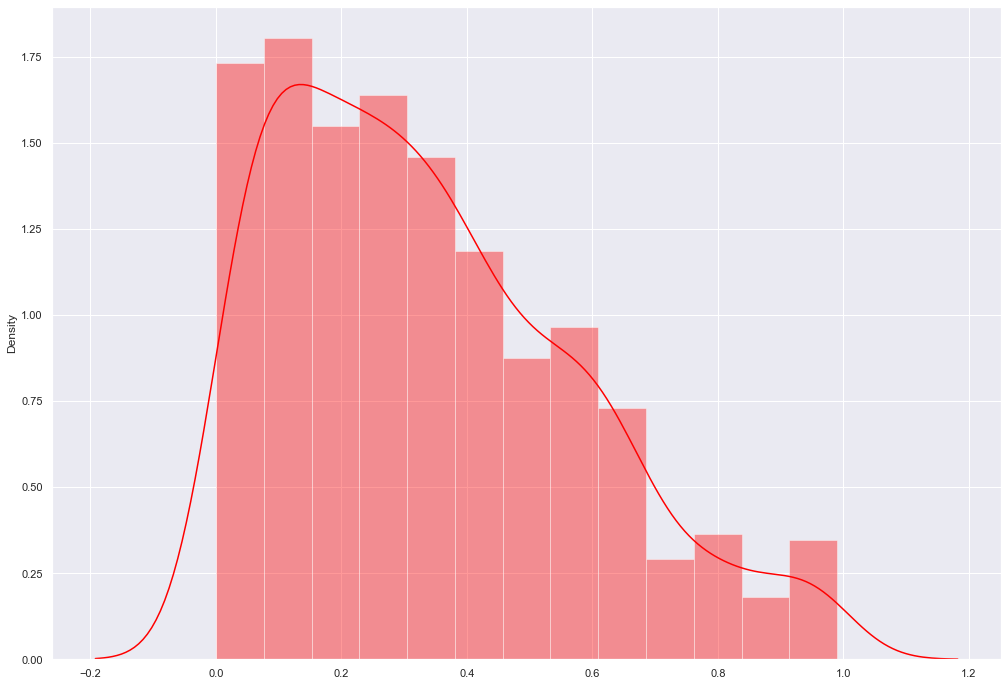

In [91]:
df=pd.read_excel("HospitalDatabase.xlsx",sheet_name="ReAdmissionRegistry")

x= df['ExpectedMortality'].values
sns.distplot(x, color = 'red')


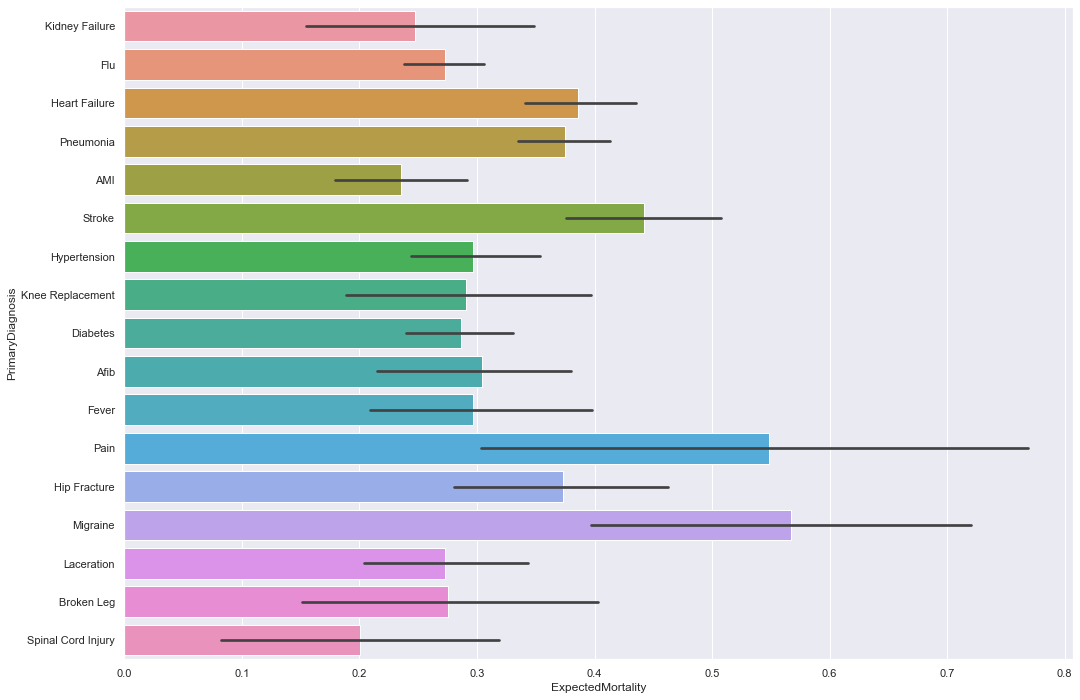

In [92]:
x=sns.barplot(x= 'ExpectedMortality', y= 'PrimaryDiagnosis', data=df)

## 71. Create a visualization on the count the no. of patients based on primary diagnosis

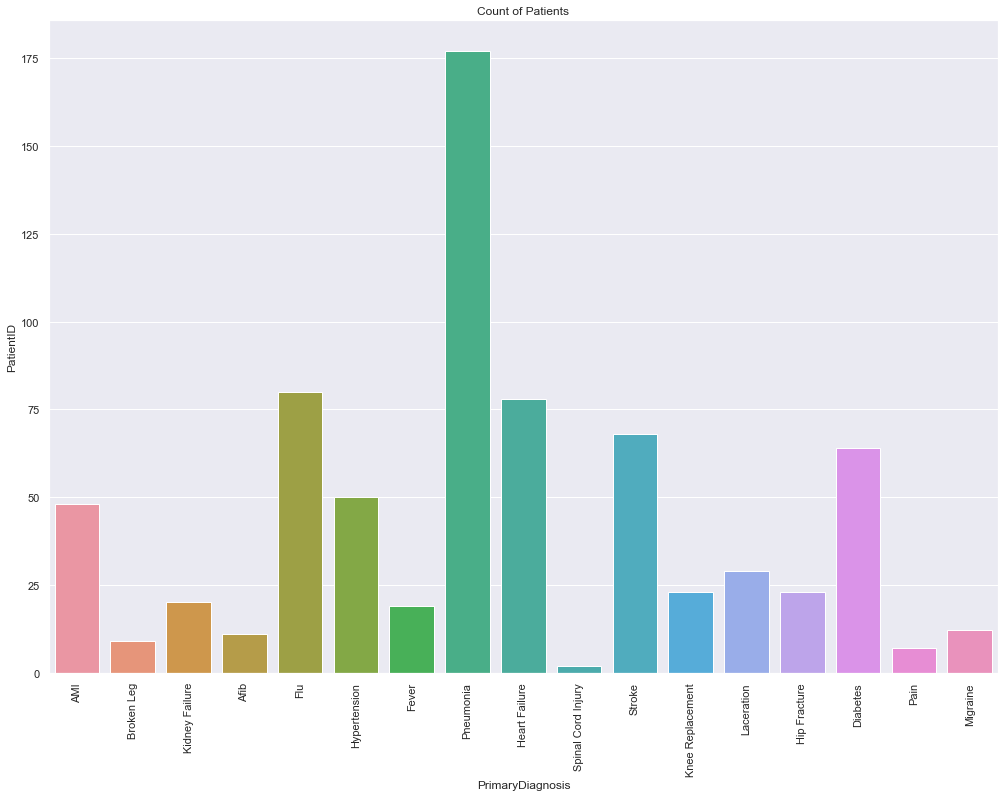

In [93]:
df=pd.read_excel("HospitalDatabase.xlsx",sheet_name="Discharges")
sns.countplot(x=df['PrimaryDiagnosis']).set(title="Count of Patients")
  # Setting the X and Y labels
plt.xlabel('PrimaryDiagnosis')
plt.ylabel('PatientID')
plt.xticks(rotation = 'vertical')
plt.show()

## 72. List male patients over the age of 60 who have undergone surgery from January-March 2019

In [94]:
df=pd.read_excel("HospitalDatabase.xlsx",sheet_name=["Patients","AmbulatoryVisits","Providers"])
df1 = df['Patients'].filter(['PatientID', 'Gender','FirstName','LastName','DateOfBirth'])
#convert age using timedelta 
now = datetime.now()
df1['Age'] =(now - df1['DateOfBirth'])/np.timedelta64(1,'Y')

df2 = df['AmbulatoryVisits'].filter(['PatientMRN','ProviderID'])
start_date=datetime(2019,1,1)
end_date= datetime(2019,3,1)

df3 = df['Providers'].filter(['ProviderID','ProviderSpecialty','ProviderDateOnStaff'])

df4 = pd.merge(df1, df2,left_on='PatientID',right_on='PatientMRN')
df5=pd.merge(df4, df3,on='ProviderID')

df5.loc[((df5['Gender'] =='Male') & (df5['Age'] > 60) &(df5['ProviderSpecialty'] =='Surgery') & (df5['ProviderDateOnStaff'] > start_date) & (df5['ProviderDateOnStaff'] > end_date))]


,PatientID,Gender,FirstName,LastName,DateOfBirth,Age,PatientMRN,ProviderID,ProviderSpecialty,ProviderDateOnStaff


## 73.Delete the column 'DischargeDispostion' iteratively

In [95]:
df=pd.read_excel("HospitalDatabase.xlsx",sheet_name="ReAdmissionRegistry")
del df['DischargeDisposition']
print('\n\nDataFrame after deleting column\n--------------')
print(df)



DataFrame after deleting column
--------------
     AdmissionID  PatientID AdmissionDate           DischargeDate  \
0            389          1    2018-01-01 2018-01-04 19:59:31.391   
1            635          2    2018-01-01 2018-01-04 21:28:51.898   
2            606          3    2018-01-01 2018-01-04 22:28:23.672   
3            587          5    2018-01-01 2018-01-05 05:47:04.933   
4            640          6    2018-01-01 2018-01-05 14:18:30.029   
..           ...        ...           ...                     ...   
715          521        738    2018-02-22 2018-03-07 21:22:10.061   
716          548        739    2018-02-22 2018-03-08 02:43:18.749   
717          509        740    2018-02-22 2018-03-08 09:27:18.377   
718          605        741    2018-02-22 2018-03-10 06:06:12.068   
719          710        742    2018-02-22 2018-03-10 20:38:30.568   

              Service PrimaryDiagnosis  ExpectedLOS  ExpectedMortality  \
0         Hospitalist   Kidney Failure     6.717

## 74.Get the list of ReasonForVisit

In [96]:
df=pd.read_excel("HospitalDatabase.xlsx",sheet_name="EDUnique")
df.head()
df.iloc[1:,5:6]

,ReasonForVisit
1,Migraine
2,Stomach Ache
3,Migraine
4,Chest Pain
5,Bleeding
...,...
940,Chest Pain
941,Pneumonia
942,Pneumonia
943,Pneumonia


## 75.Calculate the time spent in ED Department for each visit

In [97]:
df=pd.read_excel("HospitalDatabase.xlsx",sheet_name="EDUnique",usecols="A,C,D")
df
#usecols - gets the specific columns 

,EDVisitID,VisitDate,EDDischargeTime
0,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924
1,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517
2,13,2020-01-01 03:09:24.701,2020-01-01 05:00:20.852
3,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142
4,15,2020-01-01 03:46:32.698,2020-01-01 06:24:52.741
...,...,...,...
940,1183,2020-01-15 10:38:42.570,2020-01-16 02:31:52.023
941,1186,2020-01-15 11:52:37.540,2020-01-16 10:19:41.570
942,1187,2020-01-15 12:11:11.678,2020-01-15 16:41:15.223
943,1188,2020-01-15 12:21:46.006,2020-01-15 18:32:21.060


In [98]:
df['ActualLOS'] = (df['EDDischargeTime'] - df['VisitDate'])
print(df)

     EDVisitID               VisitDate         EDDischargeTime  \
0            1 2020-01-01 00:00:00.000 2020-01-01 11:20:22.924   
1           12 2020-01-01 02:45:40.302 2020-01-02 02:00:00.517   
2           13 2020-01-01 03:09:24.701 2020-01-01 05:00:20.852   
3           14 2020-01-01 03:12:19.349 2020-01-01 04:32:29.142   
4           15 2020-01-01 03:46:32.698 2020-01-01 06:24:52.741   
..         ...                     ...                     ...   
940       1183 2020-01-15 10:38:42.570 2020-01-16 02:31:52.023   
941       1186 2020-01-15 11:52:37.540 2020-01-16 10:19:41.570   
942       1187 2020-01-15 12:11:11.678 2020-01-15 16:41:15.223   
943       1188 2020-01-15 12:21:46.006 2020-01-15 18:32:21.060   
944       1189 2020-01-15 12:51:14.875 2020-01-15 23:40:41.456   

                 ActualLOS  
0   0 days 11:20:22.924000  
1   0 days 23:14:20.215000  
2   0 days 01:50:56.151000  
3   0 days 01:20:09.793000  
4   0 days 02:38:20.043000  
..                     ...  
940 

## 76. Reverse the string without using inbuilt functions

In [99]:
# A technique of defining the method/function that contains a call to itself is called recursion. 
#ANOTHER METHOD SLICING  

def reverse_string(string):
  reversed = s[::-1]      #When negative number is used as index, String is accessed backward so -1 refers to the last character, -2 second last and so on. Thus, by providing increment_step as -1 in string slicing you can reverse a string.
  return reversed

s = 'Divya'
rstring = reverse_string(s)
print('Original String-', s, 'Reversed String-', rstring)

Original String- Divya Reversed String- ayviD


## 77.Create a bar chart by making list on Acuity & EDDisposition column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method

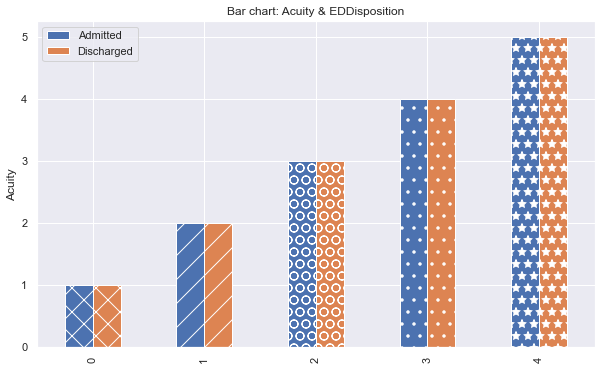

In [100]:
df=pd.read_excel("HospitalDatabase.xlsx",sheet_name="EDVisits").drop_duplicates()
a_list = list(df['EDDisposition'].unique())
b_list = list(df['Acuity'].unique())
x=np.asarray([[b_list],[b_list]]).reshape(2,5)
df_1=pd.DataFrame(x.T, columns=a_list)
ax = plt.figure(figsize=(10, 6)).add_subplot(111)
df_1.plot(ax=ax, kind='bar', legend=True)
bars = ax.patches
hatches=['x', '/', 'O', '.', '*', 'x', '/', 'O', '.', '*']
for bar,hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
plt.ylabel('Acuity')
plt.title('Bar chart: Acuity & EDDisposition')
plt.show()
    

## 78 Find reasonForVisit with highest count of acuity 5 patients

In [101]:
df=pd.read_excel("HospitalDatabase.xlsx",sheet_name="EDUnique")
#Hightest acuity 
#acuity and reasonfor visit
df.head()
df.sort_values("Acuity",ascending=False)

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
325,894,640,2020-01-11 23:54:35.826,2020-01-12 00:49:59.407,5,Chest Pain,Admitted
427,1132,878,2020-01-14 18:00:00.982,2020-01-14 23:25:23.954,5,Car Accident,Admitted
131,336,245,2020-01-05 02:41:09.557,2020-01-05 07:40:59.835,5,Accident,admitted
430,1141,887,2020-01-14 21:15:16.813,2020-01-15 13:55:11.469,5,Chest Pain,Admitted
429,1140,886,2020-01-14 20:48:24.748,2020-01-15 04:59:13.081,5,Chest Pain,Admitted
...,...,...,...,...,...,...,...
610,613,359,2020-01-08 13:12:47.660,2020-01-09 10:22:08.877,1,Stomach Ache,discharged
609,608,354,2020-01-08 11:53:35.294,2020-01-09 05:26:56.688,1,Fever,discharged
608,607,353,2020-01-08 11:51:41.858,2020-01-09 06:30:35.121,1,Shortness of Breath,discharged
607,606,352,2020-01-08 11:33:21.664,2020-01-09 03:16:46.185,1,Fever,discharged


## 79.Which PrimaryDiagnosis has the biggest difference between maximum and minimum Expected LOS?¶

In [102]:
df=pd.read_excel("HospitalDatabase.xlsx",sheet_name="Discharges")
df
#dataframe.idxmax() function returns index of first occurrence of maximum over requested axis
#use groupby to find the max and min differnce of 2 columns  
print((df.groupby(by="PrimaryDiagnosis")["ExpectedLOS"].max() - df.groupby(by="PrimaryDiagnosis")["ExpectedLOS"].min()) .idxmax(axis=0))


Pneumonia


## Q 80 - 85

## 80.Write a code snippet to print different ProviderSpecialty ( use groupby and get the list of the groups)

In [103]:
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = None)
p_grp = list(df['Providers'].groupby('ProviderSpecialty').groups)
print(p_grp)

['Cardiology', 'Pediatrics', 'PrimaryCare', 'Surgery']


## 81. Display full name of patients 

In [104]:
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = None)
df_fullname = df['Patients']['FirstName'] + ' ' + df['Patients']['LastName']
print(df_fullname)

0             Lanni Sue
1             Far Myers
2       Devlin  Michael
3         Carmine Texas
4            Tann  Bama
             ...       
940         Wat Fideler
941     Wandie Baythrop
942     Diahann Smeeton
943    Panchito Sharple
944        Walsh Calvie
Length: 945, dtype: object


## 82. Retrieve the rows where SBP<140 and DBP<80

In [105]:
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = None)
bp_rows = df['AmbulatoryVisits'][(df['AmbulatoryVisits']['BloodPressureSystolic'] < 140) & (df['AmbulatoryVisits']['BloodPressureDiastolic'] < 80)]
print(bp_rows)

     VisitID  PatientMRN  ProviderID DateofVisit           DateScheduled  \
5        809         894          31  2019-03-13 2019-02-28 10:28:01.091   
16       707         859          36  2019-03-16 2019-02-26 17:42:39.779   
18       503         887          12  2019-01-21 2019-01-07 06:04:17.575   
19       710         862           1  2019-03-19 2019-03-03 11:39:03.145   
23       711         863           1  2019-03-20 2019-03-10 07:34:56.766   
..       ...         ...         ...         ...                     ...   
909      177         815          32  2019-02-22 2019-02-04 06:53:41.987   
929      786         871          34  2019-03-25 2019-02-26 09:48:42.832   
932      394         623           6  2019-02-05 2019-01-10 05:43:34.544   
941      399         638          11  2019-02-10 2019-02-02 20:49:56.868   
943      403         650          15  2019-02-14 2019-02-11 00:47:42.216   

     VisitDepartmentID     VisitType  BloodPressureSystolic  \
5                    2  

## 83 Create the plot where x= np.arange(0, 10, 0.1) and y= np.sin(np.pi * x) + x by adding two axes to a figure object at [0.1,0.1,0.9,0.9] & [0.2,0.6,0.3,0.3]

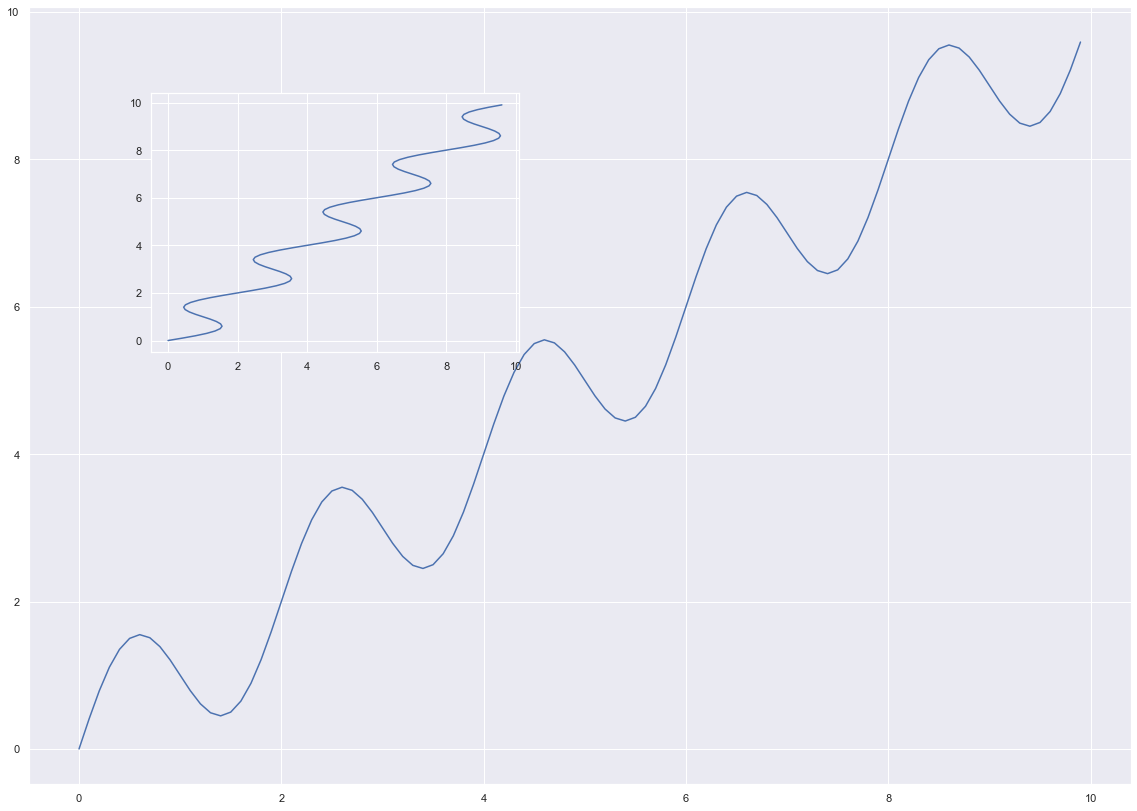

In [106]:
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x

fig=plt.figure()

fig_m= fig.add_axes([0.1,0.1,0.9,0.9])

fig_i=fig.add_axes([0.2,0.6,0.3,0.3])
fig_m.plot(x,y)
fig_i.plot(y,x)
plt.show()

## 84. Find the list of patients whose ExpectedLOS is greater than the value given by the user

In [107]:
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = None)
df['ReAdmissionRegistry'].head()
u_value = float(input("Enter expected LOS: "))
a_los = df['ReAdmissionRegistry'][df['ReAdmissionRegistry']['ExpectedLOS'] > u_value]
print(a_los)

Enter expected LOS: 6
     AdmissionID  PatientID AdmissionDate           DischargeDate  \
0            389          1    2018-01-01 2018-01-04 19:59:31.391   
4            640          6    2018-01-01 2018-01-05 14:18:30.029   
5            434          7    2018-01-01 2018-01-06 13:01:00.276   
6            549          8    2018-01-01 2018-01-07 15:39:25.987   
7              1          9    2018-01-01 2018-01-07 18:06:06.408   
..           ...        ...           ...                     ...   
712          692        735    2018-02-22 2018-03-07 06:41:40.164   
714          533        737    2018-02-22 2018-03-07 19:50:58.083   
715          521        738    2018-02-22 2018-03-07 21:22:10.061   
716          548        739    2018-02-22 2018-03-08 02:43:18.749   
719          710        742    2018-02-22 2018-03-10 20:38:30.568   

    DischargeDisposition           Service PrimaryDiagnosis  ExpectedLOS  \
0                   Home       Hospitalist   Kidney Failure     6.717771 

## 85.Find count of Black/African American, English Females

In [108]:
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = None)
cnt_f = df['Patients'][(df['Patients']['Race'] == 'Black/African-American') & (df['Patients']['Language']== 'English') & (df['Patients']['Gender'] == 'Female')]['PatientID'].count()
print(cnt_f)

119
